In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import string
import spacy
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from sklearn.base import TransformerMixin
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
os.getcwd()

'C:\\Users\\kurt_\\Dropbox\\code\\ulku\\Capstone2'

In [6]:
path='C:\\Users\\kurt_\\Dropbox\\code\\ulku\\Capstone2\\'
test=pd.read_csv(path+'data\\drugsComTest_raw.csv', parse_dates=['date'])
train=pd.read_csv(path+'data\\drugsComTrain_raw.csv', parse_dates=['date'])
print(train.head())

   uniqueID                  drugName                     condition  \
0    206461                 Valsartan  Left Ventricular Dysfunction   
1     95260                Guanfacine                          ADHD   
2     92703                    Lybrel                 Birth Control   
3    138000                Ortho Evra                 Birth Control   
4     35696  Buprenorphine / naloxone             Opiate Dependence   

                                              review  rating       date  \
0  "It has no side effect, I take it in combinati...       9 2012-05-20   
1  "My son is halfway through his fourth week of ...       8 2010-04-27   
2  "I used to take another oral contraceptive, wh...       5 2009-12-14   
3  "This is my first time using any form of birth...       8 2015-11-03   
4  "Suboxone has completely turned my life around...       9 2016-11-27   

   usefulCount  
0           27  
1          192  
2           17  
3           10  
4           37  


In [7]:
print(test.shape)
print(train.shape)

(53766, 7)
(161297, 7)


In [8]:
train.info

<bound method DataFrame.info of         uniqueID                  drugName                     condition  \
0         206461                 Valsartan  Left Ventricular Dysfunction   
1          95260                Guanfacine                          ADHD   
2          92703                    Lybrel                 Birth Control   
3         138000                Ortho Evra                 Birth Control   
4          35696  Buprenorphine / naloxone             Opiate Dependence   
...          ...                       ...                           ...   
161292    191035                   Campral            Alcohol Dependence   
161293    127085            Metoclopramide               Nausea/Vomiting   
161294    187382                   Orencia          Rheumatoid Arthritis   
161295     47128        Thyroid desiccated           Underactive Thyroid   
161296    215220              Lubiprostone         Constipation, Chronic   

                                                   revi

In [9]:
train.columns

Index(['uniqueID', 'drugName', 'condition', 'review', 'rating', 'date',
       'usefulCount'],
      dtype='object')

In [10]:
train.dtypes

uniqueID                int64
drugName               object
condition              object
review                 object
rating                  int64
date           datetime64[ns]
usefulCount             int64
dtype: object

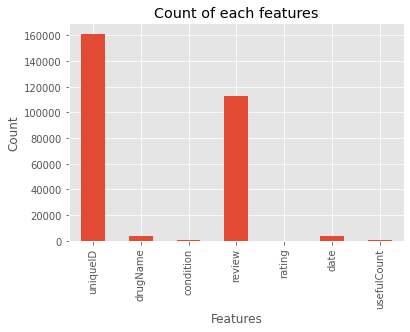

In [12]:
train.nunique().plot(kind='bar')
plt.xlabel('Features')
plt.ylabel('Count')
plt.title('Count of each features')
plt.style.use('ggplot')
plt.show()
plt.close()

In [13]:
nan=pd.DataFrame(train.isnull().sum().sort_values(ascending=False), columns = ['NULL values'])
print(nan)
percentage = 100 * nan/len(train['condition'])
print(percentage)

             NULL values
condition            899
usefulCount            0
date                   0
rating                 0
review                 0
drugName               0
uniqueID               0
             NULL values
condition       0.557357
usefulCount     0.000000
date            0.000000
rating          0.000000
review          0.000000
drugName        0.000000
uniqueID        0.000000


In [14]:
#Null values is lower than 1% so we delete them
train.dropna(inplace=True)
print(train.shape)

(160398, 7)


In [15]:
duplicateRowsDF = train[train.duplicated()]
print(duplicateRowsDF)

Empty DataFrame
Columns: [uniqueID, drugName, condition, review, rating, date, usefulCount]
Index: []


In [16]:
print(train.rating.value_counts())
print(train.usefulCount.value_counts())
print(train.condition.value_counts())
print(train.drugName.value_counts())

10    50745
9     27379
1     21504
8     18791
7      9395
5      7959
2      6879
3      6465
6      6301
4      4980
Name: rating, dtype: int64
2      6313
3      6298
0      6217
4      6189
1      6061
       ... 
340       1
730       1
337       1
400       1
585       1
Name: usefulCount, Length: 389, dtype: int64
Birth Control                   28788
Depression                       9069
Pain                             6145
Anxiety                          5904
Acne                             5588
                                ...  
Oppositional Defiant Disorde        1
Sepsis                              1
Asystole                            1
Neurotic Depression                 1
Sporotrichosis                      1
Name: condition, Length: 884, dtype: int64
Levonorgestrel                            3631
Etonogestrel                              3321
Ethinyl estradiol / norethindrone         2750
Nexplanon                                 2156
Ethinyl estradiol / norgest

"I have been on this medication almost two weeks, started out on 25mg and working my way up to 100mg, currently at 50mg. No headaches at all so far and I was having 2-3 crippling migraines a week. I have lost 5.2lbs so far but note I am really paying close attention to what I am eating, I have a lot of weight to lose and if weight loss is a side effect I want to help it along as much as I can.  Now, other side effects, they are there the word recall issues exist, the memory issues, the worst of it seems to be the vision disturbances, there have been times I have just not driven because I&#039;m sure it would not have been safe. The good news is it seems to be wearing off...I have tons of energy and I am in a great mood."


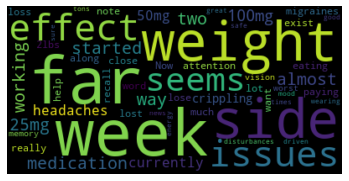

In [18]:
print(train.review[10])
text = train.review[10]
# Create and generate a word cloud image:
wordcloud = WordCloud().generate(text)
# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
plt.close()

In [19]:
print(train.agg([min, max]).T)
print(train.describe())

                                                           min  \
uniqueID                                                     2   
drugName                             A + D Cracked Skin Relief   
condition           0</span> users found this comment helpful.   
review       "\r\n\r\n please tell the ones who is sufferin...   
rating                                                       1   
date                                       2008-02-24 00:00:00   
usefulCount                                                  0   

                                                           max  
uniqueID                                                232291  
drugName                                                femhrt  
condition                                          zen Shoulde  
review       "❤️❤️❤️ Cialis for US!!    I wish I had my hus...  
rating                                                      10  
date                                       2017-12-12 00:00:00  
usefulCount     

In [20]:
train.to_csv(path+'step1.csv', index=False)